In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob
from mpl_toolkits.mplot3d import Axes3D
import re
from matplotlib.colors import ListedColormap

# Preprocessing

- Step 1.) Reading in all VMs using glob, merging them together and setting index
- Step 2.) Converting index to datetime 
- Step 3.) Subsetting VMs by cores

In [ ]:
'''
path = '/Volumes/GabeTB/Data/Energy_IoT/DataCenter/'

all_files = glob(os.path.join(path, '*.csv'))

all_df = []

for f in all_files:
    df = pd.read_csv(f, sep=';')
    all_df.append(df)
    
merged_df = pd.concat(all_df, ignore_index=True, sort=True)
merged_df.set_index('Timestamp [ms]', inplace=True)
'''

In [ ]:
'''
def datetime(df):
    
    df.index = pd.to_datetime(df.index, unit='s')
    #pd.to_datetime(df['Timestamp [ms]'], unit='s')
    
    return df

merged = datetime(merged_df)
'''

In [ ]:
'''
# Putting each CPU core value into a dataframe
one = merged[merged['\tCPU cores'] == 1]
two = merged[merged['\tCPU cores'] == 2]
four = merged[merged['\tCPU cores'] == 4]
eight = merged[merged['\tCPU cores'] == 8]
sixteen = merged[merged['\tCPU cores'] == 16]
thirtytwo = merged[merged['\tCPU cores'] == 32]
'''

In [ ]:
# Some of the files had different ending time stamps - Slicing to get all the same end times
def wrang1(df):
    df = df[0:8637]
    return df

def wrang2(df):
    df = df[0:14257]
    return df

def wrang4(df):
    df = df[0:8636]
    return df

def wrang8(df):
    df = df[0:8613]
    return df

def wrang16(df):
    df = df[0:8618]
    return df

def wrang32(df):
    df = df[0:8618]
    return df

In [ ]:
# One = index(8636)
one = wrang1(one)
# Two = index(14256)
two = wrang2(two)
# Four = index(8635)
four = wrang4(four)
# Eight = index(8612)
eight = wrang8(eight)
# Sixteen = index(8617)
sixteen = wrang16(sixteen)
# Thirtytwo = index(8617)
thirtytwo = wrang32(thirtytwo)

In [ ]:
# Exporting the final dataframes to external hard drive 
#eins = one.to_csv('/Volumes/GabeTB/Data/Energy_IoT/FinalMerged/finalone.csv')
#zwei = two.to_csv('/Volumes/GabeTB/Data/Energy_IoT/FinalMerged/finaltwo.csv')
#vier = four.to_csv('/Volumes/GabeTB/Data/Energy_IoT/FinalMerged/finalfour.csv')
#acht = eight.to_csv('/Volumes/GabeTB/Data/Energy_IoT/FinalMerged/finaleight.csv')
#sechzehn = sixteen.to_csv('/Volumes/GabeTB/Data/Energy_IoT/FinalMerged/finalsixteen.csv')
#zweiunddreisig = thirtytwo.to_csv('/Volumes/GabeTB/Data/Energy_IoT/FinalMerged/finalthirtytwo.csv')

In [2]:
# Reading the files back in 
one = pd.read_csv('/Volumes/GabeTB/Data/Energy_IoT/FinalMerged/finalone.csv')
two = pd.read_csv('/Volumes/GabeTB/Data/Energy_IoT/FinalMerged/finaltwo.csv')
four = pd.read_csv('/Volumes/GabeTB/Data/Energy_IoT/FinalMerged/finalfour.csv')
eight = pd.read_csv('/Volumes/GabeTB/Data/Energy_IoT/FinalMerged/finaleight.csv')
sixteen = pd.read_csv('/Volumes/GabeTB/Data/Energy_IoT/FinalMerged/finalsixteen.csv')
thirtytwo = pd.read_csv('/Volumes/GabeTB/Data/Energy_IoT/FinalMerged/finalthirtytwo.csv')

In [3]:
path = '/Volumes/GabeTB/Data/Energy_IoT/FinalMerged/'

all_files = glob(os.path.join(path, '*.csv'))

all_df = []

for f in all_files:
    df = pd.read_csv(f, sep=',')
    all_df.append(df)
    
final = pd.concat(all_df, ignore_index=True, sort=True)
final.set_index('Timestamp [ms]', inplace=True)

In [4]:
final.index = pd.to_datetime(final.index)

In [5]:
def setindex(df):
    
    df.set_index('Timestamp [ms]', inplace=True)
    df.index = pd.to_datetime(df.index)
    return df
    
one = setindex(one)
two = setindex(two)
four = setindex(four)
eight = setindex(eight)
sixteen = setindex(sixteen)
thirtytwo = setindex(thirtytwo)

# Feature Engineering

- Step 1.) Creating time features from the datetime index
- Step 2.) Creating new dataframes by hourly and half hourly 

In [6]:
def featEngineer(df):
    
    df['weekday'] = df.index.weekday
    df['hour'] = df.index.hour
    df['week'] = df.index.week
    df['minute'] = df.index.minute
    
featEngineer(one)
featEngineer(two)
featEngineer(four)
featEngineer(eight)
featEngineer(sixteen)
featEngineer(thirtytwo)
featEngineer(final)

/Users/gabestechschulte/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


In [7]:
def hourly(df):
    
    df_hour = df.resample('1H').mean()
    
    return df_hour

one_hour = hourly(one)
two_hour = hourly(two)
four_hour = hourly(four)
eight_hour = hourly(eight)
sixteen_hour = hourly(sixteen)
thirtytwo_hour = hourly(thirtytwo)
final_hour = hourly(final)

def half_hour(df):
    
    df_half = df.resample('30min').mean()
    
    return df_half

one_half = half_hour(one)
two_half = half_hour(two)
four_half = half_hour(four)
eight_half = half_hour(eight)
sixteen_half = half_hour(sixteen)
thirtytwo_half = half_hour(thirtytwo)

# Visualizations

- Step 1.) By minute
- Step 2.) By hour
- Step 3.) 3d scatter plots
- Step 4.) Pearson Correlation 
- Step 5.) Entire VM trace lineplot

In [8]:
def hourly(x, df):
    return df.groupby('hour')[x].mean()

def minute(x, df):
    return df.groupby('minute')[x].mean()

Text(0.5, 1.0, '1-Core CPU Average Usage by Minute')

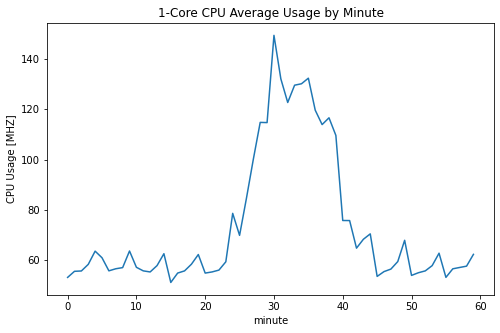

In [10]:
minute('\tCPU usage [MHZ]', one).plot(figsize=(8,5))
plt.ylabel('CPU Usage [MHZ]')
plt.title('1-Core CPU Average Usage by Minute')

Text(0.5, 1.0, '2-Core CPU Average Usage by Minute')

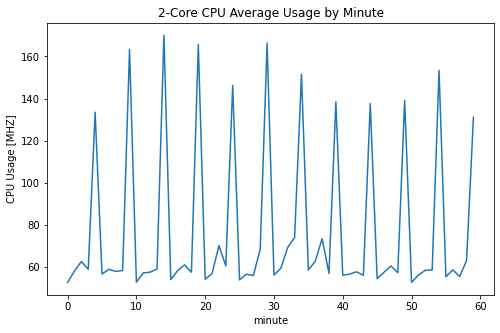

In [11]:
minute('\tCPU usage [MHZ]', two).plot(figsize=(8,5))
plt.ylabel('CPU Usage [MHZ]')
plt.title('2-Core CPU Average Usage by Minute')

Text(0.5, 1.0, '4-Core CPU Average Usage by Minute')

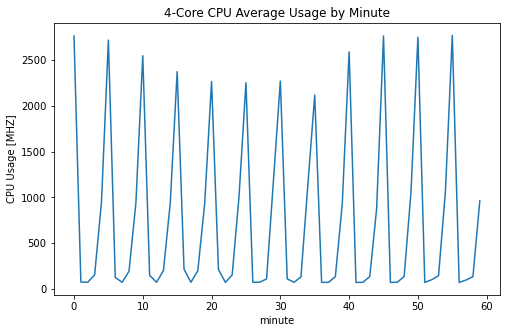

In [12]:
minute('\tCPU usage [MHZ]', four).plot(figsize=(8,5))
plt.ylabel('CPU Usage [MHZ]')
plt.title('4-Core CPU Average Usage by Minute')

Text(0.5, 1.0, '8-Core CPU Average Usage by Minute')

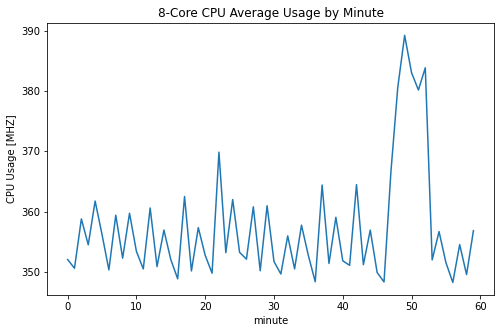

In [13]:
minute('\tCPU usage [MHZ]', eight).plot(figsize=(8,5))
plt.ylabel('CPU Usage [MHZ]')
plt.title('8-Core CPU Average Usage by Minute')

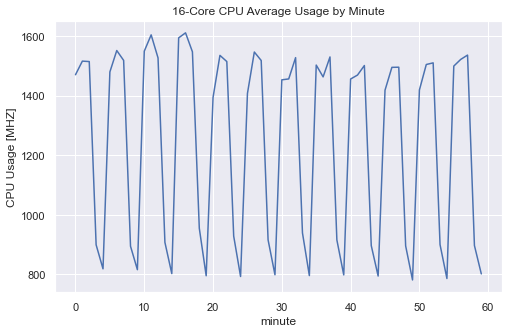

In [47]:
minute('\tCPU usage [MHZ]', sixteen).plot(figsize=(8,5))
plt.ylabel('CPU Usage [MHZ]')
plt.title('16-Core CPU Average Usage by Minute')
plt.savefig('16_core_avg_min', bbox_inches='tight', dpi=400)

Text(0.5, 1.0, '32-Core CPU Average Usage by Minute')

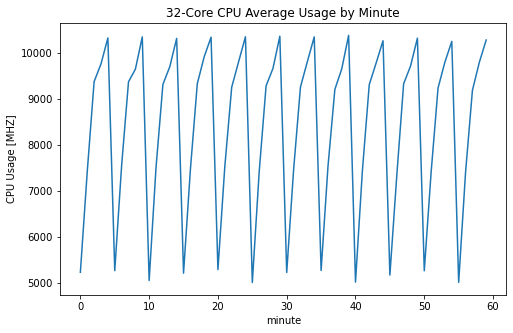

In [15]:
minute('\tCPU usage [MHZ]', thirtytwo).plot(figsize=(8,5))
plt.ylabel('CPU Usage [MHZ]')
plt.title('32-Core CPU Average Usage by Minute')

Text(0.5, 1.0, '1-Core CPU Average Usage by Hour')

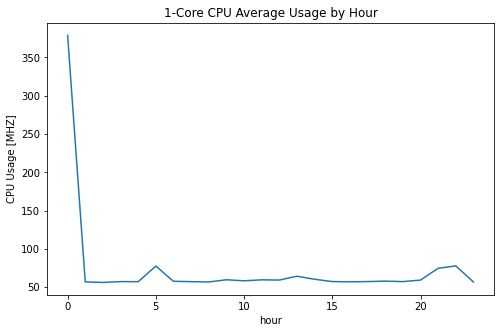

In [16]:
hourly('\tCPU usage [MHZ]', one).plot(figsize=(8,5))
plt.ylabel('CPU Usage [MHZ]')
plt.title('1-Core CPU Average Usage by Hour')

Text(0.5, 1.0, '2-Core CPU Average Usage by Hour')

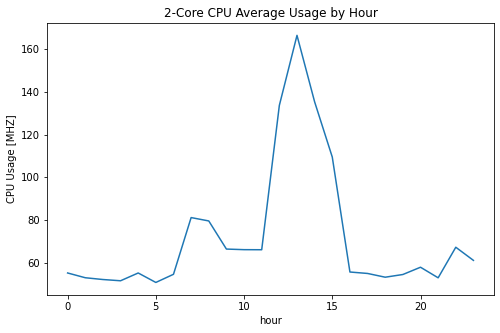

In [17]:
hourly('\tCPU usage [MHZ]', two).plot(figsize=(8,5))
plt.ylabel('CPU Usage [MHZ]')
plt.title('2-Core CPU Average Usage by Hour')

Text(0.5, 1.0, '4-Core CPU Average Usage by Hour')

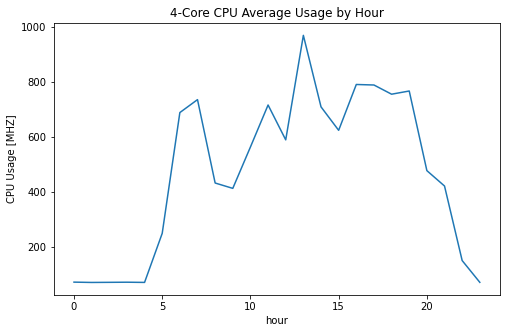

In [18]:
hourly('\tCPU usage [MHZ]', four).plot(figsize=(8,5))
plt.ylabel('CPU Usage [MHZ]')
plt.title('4-Core CPU Average Usage by Hour')

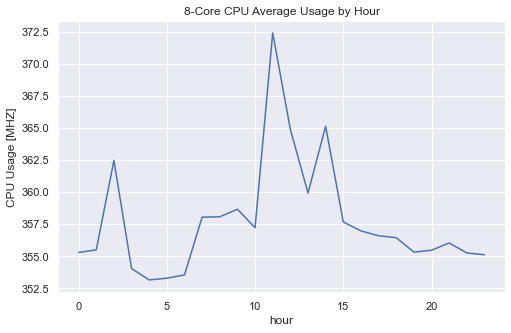

In [45]:
hourly('\tCPU usage [MHZ]', eight).plot(figsize=(8,5))
plt.ylabel('CPU Usage [MHZ]')
plt.title('8-Core CPU Average Usage by Hour')

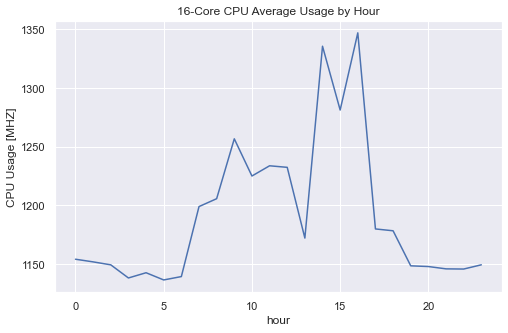

In [46]:
hourly('\tCPU usage [MHZ]', sixteen).plot(figsize=(8,5))
plt.ylabel('CPU Usage [MHZ]')
plt.title('16-Core CPU Average Usage by Hour')

Text(0.5, 1.0, '32-Core CPU Average Usage by Hour')

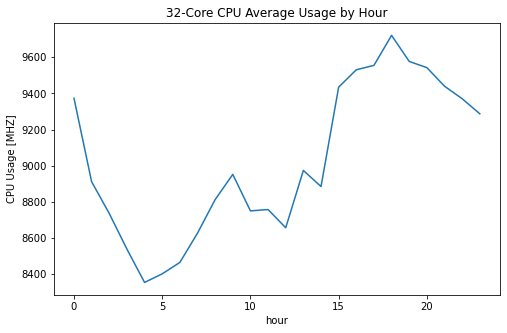

In [21]:
hourly('\tCPU usage [MHZ]', thirtytwo).plot(figsize=(8,5))
plt.ylabel('CPU Usage [MHZ]')
plt.title('32-Core CPU Average Usage by Hour')

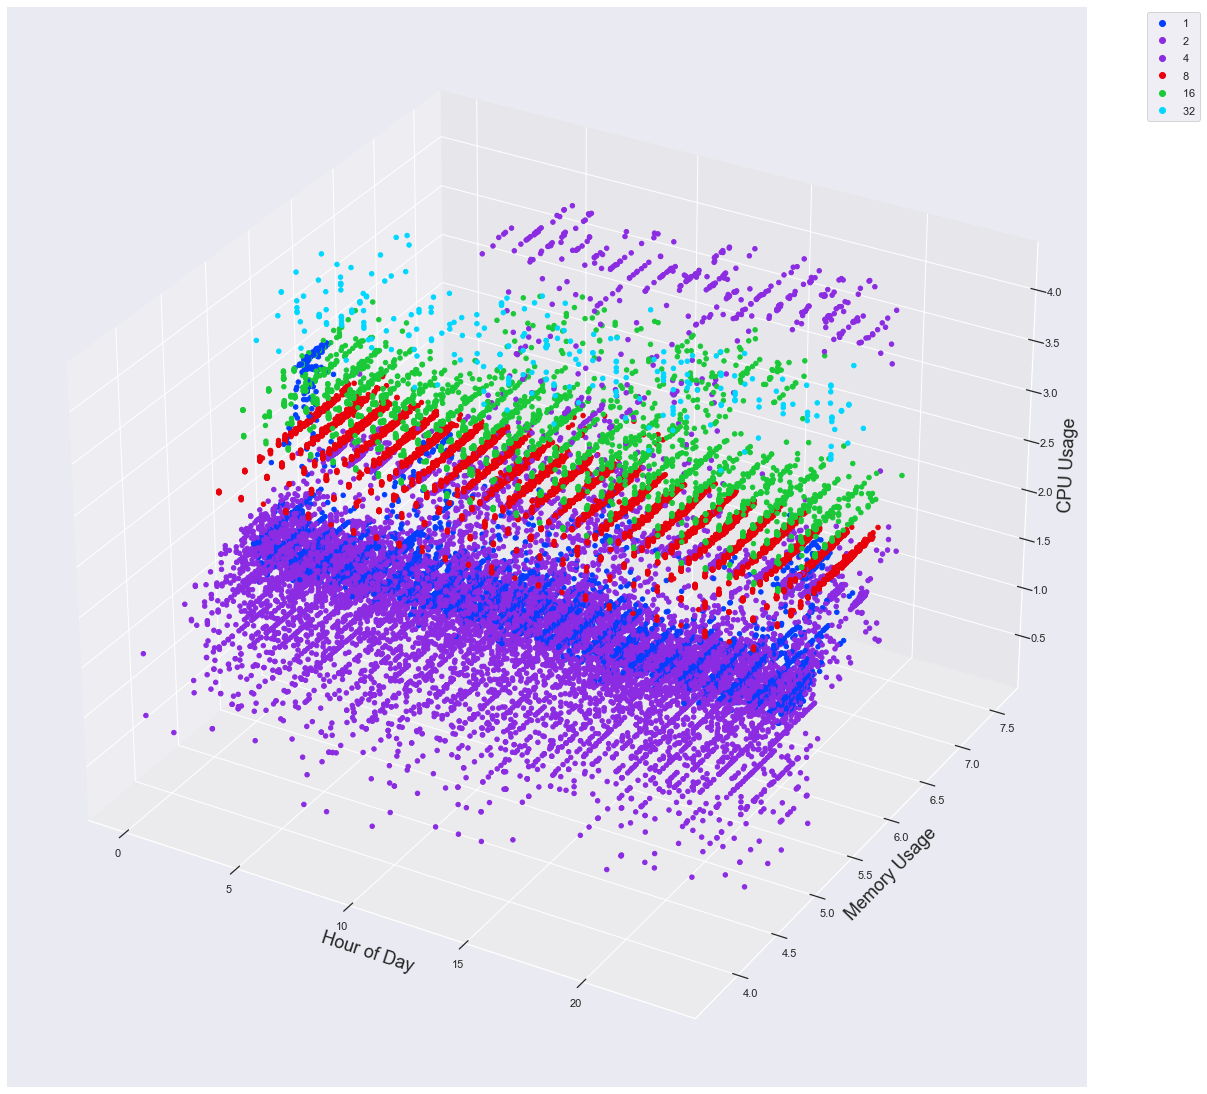

In [70]:
# Defining axis data 
x = final['hour']
y = np.log10(final['\tMemory usage [KB]'])
z = np.log10(final['\tCPU usage [MHZ]'])

# Axes instance
fig = plt.figure(figsize=(20,15))
ax = Axes3D(fig)

# Getting colormap from seaborn
cmap = ListedColormap(sns.color_palette("bright", 150))

# Plotting
sc = ax.scatter(x, y, z, s=20, c=final['\tCPU cores'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Hour of Day', fontsize=18)
ax.set_ylabel('Memory Usage', fontsize=18)
ax.set_zlabel('CPU Usage', fontsize=18)

# Legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# Saving
plt.savefig("scatter_hue", bbox_inches='tight', dpi=500)

In [23]:
# Pearson Correlation among features
def pearson(df):
    col = ['\tCPU capacity provisioned [MHZ]',
           #'\tCPU cores',
           '\tDisk read throughput [KB/s]',
           '\tDisk write throughput [KB/s]',
           '\tMemory capacity provisioned [KB]',
           '\tMemory usage [KB]',
           '\tNetwork received throughput [KB/s]',
           '\tNetwork transmitted throughput [KB/s]',
           '\tCPU usage [MHZ]',
           'weekday',
           'hour',
           'week',
           'minute']

    corr = df[col].corr()
    plt.figure(figsize=(15,10))
    sns.set(font_scale=1)
    sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', xticklabels=col, yticklabels=col)
    plt.savefig('Pearson', bbox_inches='tight', 
               dpi=400)
    plt.show();

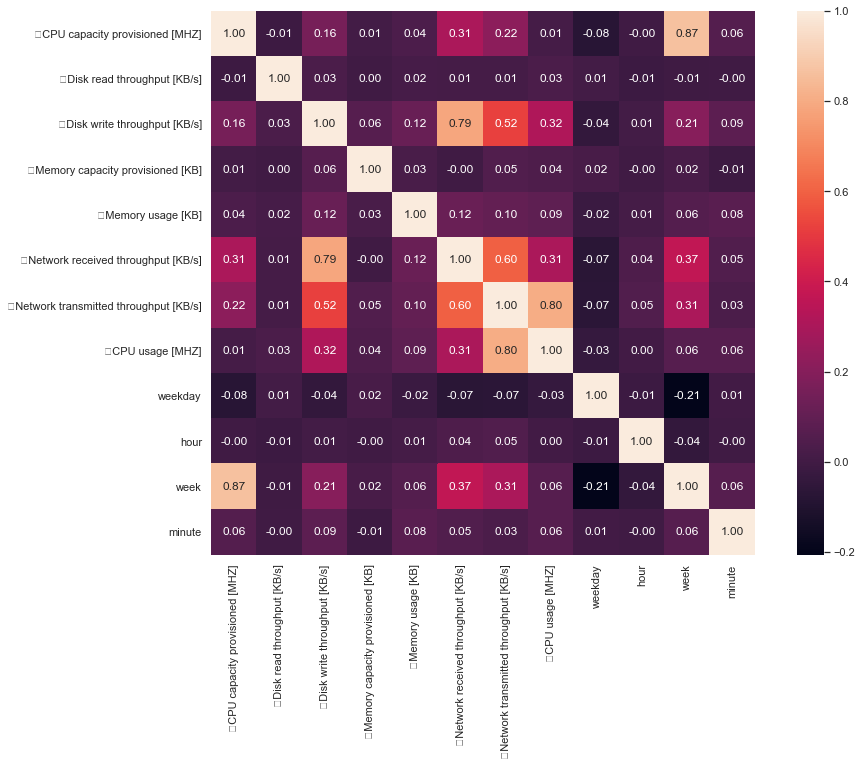

In [27]:
pearson(eight)

In [39]:
def lineplot(df, core):
    
    fig = plt.figure(figsize=(12,8))
    y = df['\tCPU usage [MHZ]']
    sns.lineplot(x=df.index, y=y, data=df)
    plt.title('{} Core CPU Utilization'.format(core))
    plt.ylabel('CPU Usage (MHZ)')
    plt.xlabel('Entire VM Trace')
    plt.xticks(rotation=90)
    plt.savefig('{}_Core_Utilization'.format(core), bbox_inches='tight', 
           dpi=400)

In [ ]:
lineplot(one, '1')

In [ ]:
lineplot(two, '2')

In [ ]:
lineplot(four, '4')

In [ ]:
lineplot(eight, '8')

In [ ]:
lineplot(sixteen, '16')

In [ ]:
lineplot(thirtytwo, '32')